In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

path = '/Users/dangloan/Documents/learning_analytics/project/'

In [66]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

In [4]:
df = pd.read_csv(path + '3_data/clothing_review/Womens Clothing E-Commerce Reviews.csv')

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.columns =['Clothing_ID',
 'Age',
 'Title',
 'Review_Text',
 'Rating',
 'Recommended_IND',
 'Positive_Feedback_Count',
 'Division_Name',
 'Department_Name',
 'Class_Name']

int64
object


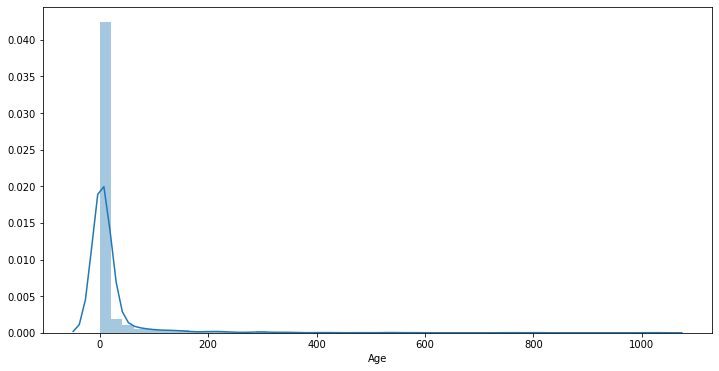

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
a = df.groupby('Clothing_ID')['Age'].count().reset_index()
b= a.sort_values(by='Age',ascending=False)
# b['Age'] = b['Age'].astype(int)
b['Clothing_ID'] = b['Clothing_ID'].astype(str)
print(b['Age'].dtype)
print(b['Clothing_ID'].dtype)

fig, ax1 = plt.subplots(figsize=(12,6))
sns.distplot(a['Age'])

##### A product (Clothing_ID) can receive more than one review. So, analysis per product can be an idea.

In [145]:
b.iloc[3]

Clothing_ID    1081
Age            560 
Name: 1055, dtype: object

In [9]:
b[b['Clothing_ID'] == '1081']

,Clothing_ID,Age
1081,1081,582


In [8]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)

In [9]:
profile

Number of variables,10
Number of observations,23486
Total Missing (%),2.0%
Total size in memory,1.8 MiB
Average record size in memory,80.0 B
Numeric,4
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [7]:
#Clean data
#First remove duplicates
df[df.duplicated(keep=False)].sort_values(by='Clothing_ID')
df.drop_duplicates(keep='first',inplace=True)
# df[df['Clothing_ID'] == 862]

In [11]:
a = df.groupby('Class_Name').agg({'Rating': ['mean','count']}).reset_index()
a.columns = ['Class_Name','Rating_mean','Rating_count']
a.sort_values('Rating_mean',ascending=False)

,Class_Name,Rating_mean,Rating_count
1,Casual bottoms,4.500000,2
9,Layering,4.376712,146
7,Jeans,4.360384,1146
11,Lounge,4.301013,691
6,Jackets,4.295455,704
16,Sleep,4.285088,228
5,Intimates,4.279221,154
10,Legwear,4.278788,165
13,Pants,4.265850,1388
4,Fine gauge,4.260237,1099


### Visualize data with wordcloud

Now, I would be curious to see what customers like and don't like in the high rating (Layering, Jeans, etc.) and lower-than-average rating (Trend, Dressees, Blouses)

In [12]:
# Explore review review title with wordcloud
# Start with loading all necessary libraries
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

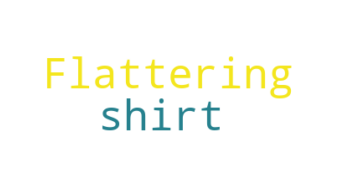

In [13]:
# Start with one review:
text = df.Title[4]

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# %% [code]
df1 = df[(df['Rating'] <= 2)]
df2 = df[(df['Rating'] == 5)]
df3 = df[(df['Rating'] <= 2) & (df['Class_Name'] == 'Blouses')]

There are 44462 words in the combination of all review.


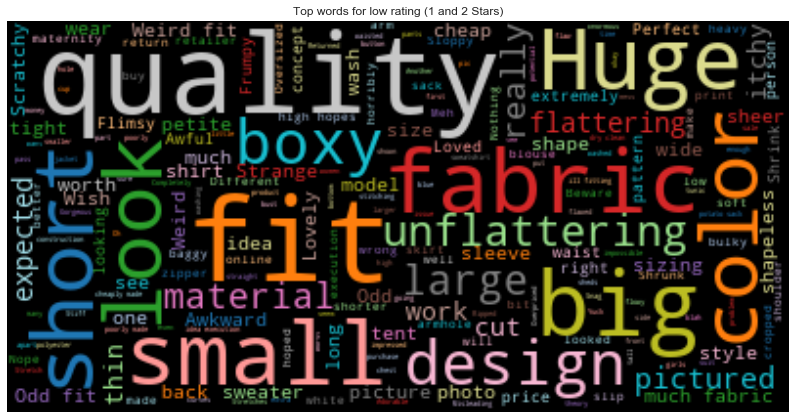

In [16]:
# %% [code]
text = " ".join(review for review in df1.Title.astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','sadly','nice','great','pretty','horrible',
                  'super','poor','sad','way','jeans','run','runs','pant'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[14,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()

There are 3753646 words in the combination of all review.


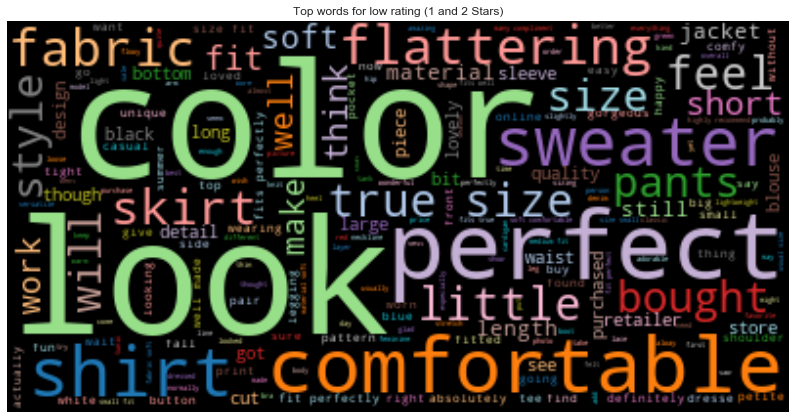

In [17]:
# %% [code]
text = " ".join(review for review in df2['Review_Text'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','sadly','nice','great','pretty','horrible',
                  'super','poor','sad','way','jeans','run','runs','pant',
                 'really','back','even','much','ordered','wear','one','tried'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[14,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()

There are 6332 words in the combination of all review.


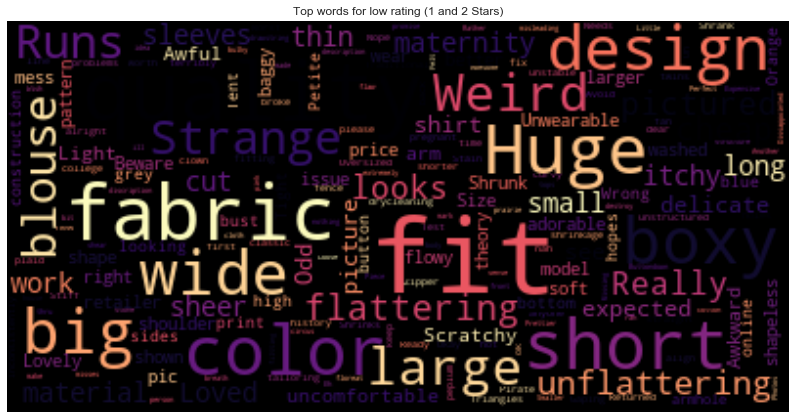

In [18]:
# %% [code]
text = " ".join(review for review in df3['Title'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','nice','great','pretty','horrible',
                  'super','poor','sad','way'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                     colormap="magma").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[14,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()



## Topic modeling by Clothing_ID

##### I'm trying to see what people talk about in each product, i.e. if they like or dislike(rating average), then what they like/dislike about that product. I use topic modeling using LDA model. An expected result of the model would be that, for clothing id 1001, positive reviews talk most about quality, while negative reviews talk most about price, etc.

In [81]:
df['Review_Text'].describe()

count     22613                                                                             
unique    22607                                                                             
top       Perfect fit and i've gotten so many compliments. i buy all my suits from here now!
freq      3                                                                                 
Name: Review_Text, dtype: object

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
df['Review_Text'] = df['Review_Text'].astype(str)

In [10]:
from langdetect import detect

from tqdm import tqdm
tqdm.pandas()

df['lang'] = df['Review_Text'].apply(detect)
df = df.loc[df.lang=='en']

100%|██████████| 23465/23465 [02:34<00:00, 151.95it/s]


In [19]:
df = df.loc[df.lang=='en']

In [20]:
df2 = df.groupby('Clothing_ID')['Review_Text'].apply(lambda x: x.sum()).reset_index()

In [21]:
len(df2)

1178

In [149]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
my_words = ['way','back','x','bit','JJS','DT','CD']
stop_words = stop_words.union(my_words)

In [150]:
# Clean Review_Text

def clean(text):
    #Remove punctuations
    t = re.sub('[^a-zA-Z]',' ',text)
    #Convert to lowercase
    t = t.lower()
    #Remove tags
    t=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",t)
    #Remove special characters and digits
    t=re.sub("(\\d|\\W)+"," ",t)
#     #Convert to list from string
    t = t.split()
    #Remove stopwords
    t = [word for word in t if not word in stop_words]
    
    
    t = " ".join(t)
    return t

df2['Review_Text_cleaned'] = df2['Review_Text'].apply(lambda x: clean(x))

# df2['Review_Text_cleaned1'] =df2['Review_Text_cleaned'].apply(
#     lambda l: [item for sublist in l for item in sublist])
df2['Review_Text_cleaned'].dropna(inplace=True)

In [151]:
#Tokenize
from nltk.tokenize import sent_tokenize
df2['Review_Text_sentences'] = df2['Review_Text_cleaned'].apply(sent_tokenize)

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def token_text(text):
    return [w_tokenizer.tokenize(w) for w in text]
df2['Review_Text_tokenized'] = df2['Review_Text_sentences'].apply(token_text)

[nltk_data] Downloading package punkt to /Users/dangloan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [152]:
df2.head(1)

,Clothing_ID,Review_Text,Review_Text_cleaned,Review_Text_sentences,Review_Text_tokenized,Review_Text_postag,Review_Text_lemmatized,flatten_tokens
0,1,"Originally i bought this in black and white. recently purchased several more in different colorways . why? it's just perfect to wear as an under tank/cami. i'm a busty gal and sometimes cami straps can be too thin and dig into my shoulders. this is soft, smooth and provides just enough coverage. very flattering fit on its own as well. great under loose knit or low cut sweaters. love!Love this tank. material and fit are great. love that it's reversible. highly recommend!I love this tank, it is so comfortable but it does have its flaws. it rolls up every time i walk or do anything, it becomes very bothersome.",originally bought black white recently purchased several different colorways perfect wear tank cami busty gal sometimes cami straps thin dig shoulders soft smooth provides enough coverage flattering fit well great loose knit low cut sweaters love love tank material fit great love reversible highly recommend love tank comfortable flaws rolls every time walk anything becomes bothersome,[originally bought black white recently purchased several different colorways perfect wear tank cami busty gal sometimes cami straps thin dig shoulders soft smooth provides enough coverage flattering fit well great loose knit low cut sweaters love love tank material fit great love reversible highly recommend love tank comfortable flaws rolls every time walk anything becomes bothersome],"[[originally, bought, black, white, recently, purchased, several, different, colorways, perfect, wear, tank, cami, busty, gal, sometimes, cami, straps, thin, dig, shoulders, soft, smooth, provides, enough, coverage, flattering, fit, well, great, loose, knit, low, cut, sweaters, love, love, tank, material, fit, great, love, reversible, highly, recommend, love, tank, comfortable, flaws, rolls, every, time, walk, anything, becomes, bothersome]]","[[(originally, RB), (bought, VBD), (black, JJ), (white, JJ), (recently, RB), (purchased, VBD), (several, JJ), (different, JJ), (colorways, NNS), (perfect, VBP), (wear, JJ), (tank, NN), (cami, NN), (busty, JJ), (gal, NN), (sometimes, RB), (cami, JJ), (straps, NNS), (thin, JJ), (dig, NN), (shoulders, NNS), (soft, JJ), (smooth, JJ), (provides, VBZ), (enough, JJ), (coverage, NN), (flattering, NN), (fit, NN), (well, RB), (great, JJ), (loose, JJ), (knit, NNS), (low, JJ), (cut, VBD), (sweaters, NNS), (love, VBP), (love, NN), (tank, NN), (material, JJ), (fit, JJ), (great, JJ), (love, NN), (reversible, JJ), (highly, RB), (recommend, VBP), (love, NN), (tank, NN), (comfortable, JJ), (flaws, NNS), (rolls, NNS), (every, DT), (time, NN), (walk, NN), (anything, NN), (becomes, VBZ), (bothersome, VB)]]","[[RB, VBD, JJ, JJ, RB, VBD, JJ, JJ, colorways, VBP, JJ, tank, cami, JJ, gal, RB, JJ, strap, JJ, dig, shoulder, JJ, JJ, VBZ, JJ, coverage, flattering, fit, RB, JJ, JJ, knit, JJ, VBD, sweater, VBP, love, tank, JJ, JJ, JJ, love, JJ, RB, VBP, love, tank, JJ, flaw, roll, DT, time, walk, anything, VBZ, VB]]","[originally, VBD, black, white, recently, VBD, several, different, colorways, VBP, wear, tank, cami, busty, gal, sometimes, cami, strap, thin, dig, shoulder, soft, smooth, VBZ, enough, coverage, flattering, fit, well, great, loose, knit, low, VBD, sweater, VBP, love, tank, material, fit, great, love, reversible, highly, VBP, love, tank, comfortable, flaw, roll, DT, time, walk, anything, VBZ, VB]"


In [153]:
#POS tagging
from nltk import pos_tag

# def pos_tag(text):
#     return [pos_tag(w) for w in text]
# df2['Review_Text_postag'] = df2['Review_Text_sentences'].apply(pos_tag) ## This function results in an 
#                                                                            ## error "Maximum recursion"

df2['Review_Text_postag'] = df2['Review_Text_tokenized'].apply(lambda sentence:
                        [pos_tag(token) for token in sentence])

In [154]:
# convert Penn treebank tag to wordnet tag
def penn_to_wn_tags(pos_tag):
    if pos_tag.startswith('N'):
        return wordnet.NOUN
#     elif pos_tag.startswith('V'):
#         return wordnet.VERB
#     elif pos_tag.startswith('J'):
#         return wordnet.ADJ
#     elif pos_tag.startswith('R'):
#         return wordnet.ADV
    else:
        return None

# lemmatize text based on POS tags
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_text(text):
#     pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [[wnl.lemmatize(el[0], penn_to_wn_tags(el[1]))
                         if penn_to_wn_tags(el[1]) else el[1]
                         for el in pos_tagged_text]
                         for pos_tagged_text in text]
    
    return lemmatized_tokens

In [155]:
df2['Review_Text_lemmatized'] = df2['Review_Text_postag'].apply(lemmatize_text)

In [156]:
df2.sample()

,Clothing_ID,Review_Text,Review_Text_cleaned,Review_Text_sentences,Review_Text_tokenized,Review_Text_postag,Review_Text_lemmatized,flatten_tokens
10,12,"Love this striped top! it's perfect to throw on with black skinnies and a denim jacket or long grey cardigan. it also pairs well with camel. it is super soft. runs big imo, even though other reviewers said small. like most bordeaux, i took an xs, whereas i wear a small in most other retailer brands. similar to the photo, although much looser on me.",love striped top perfect throw black skinnies denim jacket long grey cardigan also pairs well camel super soft runs big imo even though reviewers said small like bordeaux took xs whereas wear small retailer brands similar photo although much looser,[love striped top perfect throw black skinnies denim jacket long grey cardigan also pairs well camel super soft runs big imo even though reviewers said small like bordeaux took xs whereas wear small retailer brands similar photo although much looser],"[[love, striped, top, perfect, throw, black, skinnies, denim, jacket, long, grey, cardigan, also, pairs, well, camel, super, soft, runs, big, imo, even, though, reviewers, said, small, like, bordeaux, took, xs, whereas, wear, small, retailer, brands, similar, photo, although, much, looser]]","[[(love, NN), (striped, VBD), (top, JJ), (perfect, NN), (throw, NN), (black, JJ), (skinnies, NNS), (denim, VBP), (jacket, NN), (long, RB), (grey, JJ), (cardigan, NN), (also, RB), (pairs, RB), (well, RB), (camel, JJ), (super, JJ), (soft, JJ), (runs, NNS), (big, JJ), (imo, NN), (even, RB), (though, IN), (reviewers, NNS), (said, VBD), (small, JJ), (like, IN), (bordeaux, JJ), (took, VBD), (xs, NNP), (whereas, JJ), (wear, VBP), (small, JJ), (retailer, NN), (brands, NNS), (similar, JJ), (photo, NN), (although, IN), (much, JJ), (looser, NN)]]","[[love, VBD, JJ, perfect, throw, JJ, skinny, VBP, jacket, RB, JJ, cardigan, RB, RB, RB, JJ, JJ, JJ, run, JJ, imo, RB, IN, reviewer, VBD, JJ, IN, JJ, VBD, x, JJ, VBP, JJ, retailer, brand, JJ, photo, IN, JJ, looser]]","[love, VBD, top, perfect, throw, black, skinny, VBP, jacket, long, grey, cardigan, pair, well, VBP, super, soft, run, big, imo, even, IN, reviewer, VBD, small, IN, bordeaux, VBD, x, whereas, VBP, small, retailer, brand, similar, photo, IN, much, looser]"


In [76]:
x = df.groupby('Clothing_ID')['Class_Name'].nunique().reset_index().sort_values('Class_Name', ascending=False)

,Clothing_ID,Class_Name
0,1,1
774,798,1
790,814,1
789,813,1
788,812,1
787,811,1
786,810,1
785,809,1
784,808,1
783,807,1


In [79]:
df.groupby('Clothing_ID')['Division_Name'].nunique().reset_index().sort_values('Division_Name', ascending=False)

,Clothing_ID,Division_Name
884,909,2
950,975,2
939,964,2
940,965,2
941,966,2
944,969,2
945,970,2
949,974,2
951,976,2
934,959,2


In [157]:
##Get some information of the clothing item from df dataset
# df.loc[df['Clothing_ID'] == 1119, 'Class_Name'] = "Outerwear"
# df_map = df[['Clothing_ID','Class_Name','Department_Name']]
# df_map.drop_duplicates(keep='first', inplace=True)

df_rate_pos = df[df['Rating'] > 3]
df_rate_neg = df[df['Rating'] <= 3]

df_pos = df2[df2['Clothing_ID'].isin(df_rate_pos['Clothing_ID'])]
df_pos = df2[df2['Clothing_ID'].isin(df_rate_neg['Clothing_ID'])]


# df_rate = df.groupby('Clothing_ID')['Rating'].mean().reset_index()
# df3 = pd.merge(df2, df_rate, how='left', on='Clothing_ID')

# df_pos = df3[df3['Rating'] > 3]
# df_neg = df3[df3['Rating'] <= 3]

In [158]:
df_pos.describe()

,Clothing_ID
count,577.000000
mean,709.519931
std,339.870855
min,1.000000
25%,391.000000
50%,826.000000
75%,995.000000
max,1203.000000


### Building LDA model

In [159]:
# %% [code]
import itertools
from gensim import corpora, models

# list_of_list_of_tokens = [["a","b","c"], ["d","e","f"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...

df_pos['flatten_tokens'] = df_pos['Review_Text_lemmatized'].apply(
    lambda x : list(itertools.chain.from_iterable(x)))

list_of_list_of_tokens = df_pos['flatten_tokens'].tolist()
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 10
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


CPU times: user 8.38 s, sys: 405 ms, total: 8.78 s
Wall time: 5.74 s


In [160]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.030*"shirt" + 0.023*"top" + 0.019*"jean" + 0.015*"skirt" + 0.012*"fabric" + 0.010*"work" + 0.010*"medium" + 0.010*"length" + 0.010*"tee" + 0.009*"cute" + 0.009*"retailer" + 0.009*"style" + 0.008*"JJS" + 0.008*"sale" + 0.008*"cut" + 0.008*"x" + 0.008*"summer" + 0.008*"model" + 0.008*"blouse" + 0.008*"store"

1: 0.072*"dress" + 0.033*"skirt" + 0.015*"fabric" + 0.013*"waist" + 0.011*"length" + 0.011*"style" + 0.010*"store" + 0.010*"summer" + 0.009*"work" + 0.009*"retailer" + 0.009*"JJS" + 0.008*"feel" + 0.008*"design" + 0.008*"medium" + 0.007*"hip" + 0.007*"side" + 0.007*"top" + 0.007*"shape" + 0.007*"person" + 0.007*"cut"

2: 0.056*"dress" + 0.019*"skirt" + 0.014*"design" + 0.013*"fabric" + 0.011*"waist" + 0.011*"retailer" + 0.011*"length" + 0.010*"DT" + 0.010*"store" + 0.009*"work" + 0.009*"JJS" + 0.008*"summer" + 0.007*"side" + 0.007*"feel" + 0.007*"detail" + 0.007*"bra" + 0.007*"shape" + 0.007*"sale" + 0.006*"price" + 0.006*"day"

3: 0.127*"dress" + 0.011*"length" + 0.011*"fabric

In [161]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [162]:
# %% [code]
import itertools
from gensim import corpora, models

# list_of_list_of_tokens = [["a","b","c"], ["d","e","f"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...

df_neg['flatten_tokens'] = df_neg['Review_Text_lemmatized'].apply(
    lambda x : list(itertools.chain.from_iterable(x)))

list_of_list_of_tokens1 = df_neg['flatten_tokens'].tolist()
dictionary_LDA1 = corpora.Dictionary(list_of_list_of_tokens1)
dictionary_LDA1.filter_extremes(no_below=3)
corpus1 = [dictionary_LDA1.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens1]

num_topics1 = 7
%time lda_model1 = models.LdaModel(corpus1, num_topics=num_topics1, \
                                  id2word=dictionary_LDA1, \
                                  passes=4, alpha=[0.01]*num_topics1, \
                                  eta=[0.01]*len(dictionary_LDA1.keys()))

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


CPU times: user 765 ms, sys: 7.2 ms, total: 772 ms
Wall time: 784 ms


In [163]:
for i,topic in lda_model1.show_topics(formatted=True, num_topics=num_topics1, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.038*"sweater" + 0.027*"suit" + 0.026*"top" + 0.026*"VBZ" + 0.025*"MD" + 0.019*"short" + 0.018*"back" + 0.017*"size" + 0.016*"thin" + 0.015*"disappointed" + 0.014*"large" + 0.013*"soft" + 0.013*"comfortable" + 0.013*"piece" + 0.013*"well" + 0.013*"fabric" + 0.012*"small" + 0.012*"CD" + 0.012*"long" + 0.011*"cute"

1: 0.036*"small" + 0.028*"usually" + 0.025*"dress" + 0.019*"large" + 0.018*"even" + 0.018*"material" + 0.016*"medium" + 0.016*"still" + 0.014*"color" + 0.014*"fabric" + 0.013*"CD" + 0.012*"size" + 0.012*"VBZ" + 0.012*"quality" + 0.011*"retailer" + 0.011*"time" + 0.011*"MD" + 0.010*"return" + 0.010*"bottom" + 0.009*"pretty"

2: 0.054*"VBZ" + 0.028*"beach" + 0.024*"expensive" + 0.024*"cover" + 0.021*"dress" + 0.020*"fabric" + 0.020*"small" + 0.019*"completely" + 0.019*"sale" + 0.018*"beautiful" + 0.017*"quality" + 0.016*"website" + 0.016*"picture" + 0.016*"bra" + 0.015*"good" + 0.015*"love" + 0.014*"long" + 0.014*"piece" + 0.014*"weight" + 0.013*"back"

3: 0.053*"short" + 0

In [164]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model1, corpus=corpus1, dictionary=dictionary_LDA1)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
